# Five Personality Traits Prediction


## Installations

In [1]:
!pip install yellowbrick


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Improting

In [161]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


## Loading the Data Set

In [162]:
df = pd.read_csv('../data/raw/data-final.csv', sep='\t')

## Data Profiling

In [163]:
df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,...,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,...,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,...,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,...,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,...,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,...,8.0,315.0,17,2,KE,1.0,38.0


In [164]:
df.tail()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,...,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
1015336,4.0,2.0,4.0,3.0,4.0,3.0,3.0,...,3.0,160.0,10,2,US,39.9883,-75.2208
1015337,4.0,3.0,4.0,3.0,3.0,3.0,4.0,...,3.0,122.0,7,1,US,38.0,-97.0
1015338,4.0,2.0,4.0,3.0,5.0,1.0,4.0,...,2.0,135.0,12,6,US,36.1473,-86.777
1015339,2.0,4.0,3.0,4.0,2.0,2.0,1.0,...,6.0,212.0,8,1,US,34.1067,-117.8067
1015340,4.0,2.0,4.0,2.0,4.0,1.0,4.0,...,3.0,176.0,9,1,US,38.0,-97.0


In [165]:
df.shape

(1015341, 110)

In [166]:
df.columns

Index(['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9',
       'EXT10',
       ...
       'dateload', 'screenw', 'screenh', 'introelapse', 'testelapse',
       'endelapse', 'IPC', 'country', 'lat_appx_lots_of_err',
       'long_appx_lots_of_err'],
      dtype='object', length=110)

From the dataset `codebook.txt`; which has specifications about the columns. It says:

There're 10 questions for each type `EXT`, `EST`..etc., in total 50 questions are there. And each one were answered with 1-5, where:

Disagree = 1, Neutral = 3, and Agree = 5.

And it has also these columns:
- The time spent on each question is also recorded in milliseconds. `These are the variables ending in _E`. This was calculated by taking the time when the button for the question was clicked minus the time of the most recent other button click.
- `dateload`:   The timestamp when the survey was started.
- `screenw`:     The width the of user's screen in pixels
- `screenh`:     The height of the user's screen in pixels
- `introelapse`: The time in seconds spent on the landing / intro page
- `testelapse`:  The time in seconds spent on the page with the survey questions
- `endelapse`:   The time in seconds spent on the finalization page (where the user was asked to indicate if they has answered accurately and their answers could be stored and used for research. Again: this dataset only includes users who answered "Yes" to this question, users were free to answer no and could still view their results either way)

- `IPC`:         The number of records from the user's IP address in the dataset. For max cleanliness, only use records where this value is 1. High values can be because of shared networks (e.g. entire universities) or multiple submissions

- `country`:     The country, determined by technical information (NOT ASKED AS A QUESTION)

- `lat_appx_lots_of_err`:    approximate latitude of user. determined by technical information, THIS IS NOT VERY ACCURATE. Read the article "How an internet mapping glitch turned a random Kansas farm into a digital hell" https://splinternews.com/how-an-internet-mapping-glitch-turned-a-random-kansas-f-1793856052 to learn about the perils of relying on this information
- `long_appx_lots_of_err`:   approximate longitude of user

**The mention above we'd not need it so, we'll drop them**

In [167]:
# Drop all columns after 'OPN10' until before 'country', keep 'country'
opn10_index = df.columns.get_loc("OPN10")
country_index = df.columns.get_loc("country")

# Get the columns to drop
cols_to_drop = df.columns[opn10_index + 1:country_index].tolist()

# Drop'em
df = df.drop(columns=cols_to_drop)

In [168]:
df.columns

Index(['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9',
       'EXT10', 'EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8',
       'EST9', 'EST10', 'AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7',
       'AGR8', 'AGR9', 'AGR10', 'CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6',
       'CSN7', 'CSN8', 'CSN9', 'CSN10', 'OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5',
       'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10', 'country',
       'lat_appx_lots_of_err', 'long_appx_lots_of_err'],
      dtype='object')

In [169]:
df

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,...,OPN7,OPN8,OPN9,OPN10,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,...,5.0,3.0,4.0,5.0,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,...,4.0,2.0,5.0,3.0,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,...,5.0,3.0,4.0,4.0,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,...,4.0,4.0,3.0,3.0,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,...,5.0,3.0,5.0,5.0,KE,1.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015336,4.0,2.0,4.0,3.0,4.0,3.0,3.0,...,4.0,2.0,2.0,4.0,US,39.9883,-75.2208
1015337,4.0,3.0,4.0,3.0,3.0,3.0,4.0,...,3.0,4.0,5.0,4.0,US,38.0,-97.0
1015338,4.0,2.0,4.0,3.0,5.0,1.0,4.0,...,5.0,5.0,4.0,5.0,US,36.1473,-86.777
1015339,2.0,4.0,3.0,4.0,2.0,2.0,1.0,...,4.0,5.0,5.0,3.0,US,34.1067,-117.8067


In [170]:
df.drop(columns=['long_appx_lots_of_err', 'lat_appx_lots_of_err'], inplace=True, axis=1)

In [171]:
df

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,...,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,...,4.0,1.0,5.0,3.0,4.0,5.0,GB
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,...,3.0,1.0,4.0,2.0,5.0,3.0,MY
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,...,4.0,2.0,5.0,3.0,4.0,4.0,GB
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,...,3.0,1.0,4.0,4.0,3.0,3.0,GB
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,...,5.0,1.0,5.0,3.0,5.0,5.0,KE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015336,4.0,2.0,4.0,3.0,4.0,3.0,3.0,...,4.0,2.0,4.0,2.0,2.0,4.0,US
1015337,4.0,3.0,4.0,3.0,3.0,3.0,4.0,...,5.0,1.0,3.0,4.0,5.0,4.0,US
1015338,4.0,2.0,4.0,3.0,5.0,1.0,4.0,...,4.0,1.0,5.0,5.0,4.0,5.0,US
1015339,2.0,4.0,3.0,4.0,2.0,2.0,1.0,...,3.0,2.0,4.0,5.0,5.0,3.0,US


## Explore The Data

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015341 entries, 0 to 1015340
Data columns (total 51 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   EXT1     1013558 non-null  float64
 1   EXT2     1013558 non-null  float64
 2   EXT3     1013558 non-null  float64
 3   EXT4     1013558 non-null  float64
 4   EXT5     1013558 non-null  float64
 5   EXT6     1013558 non-null  float64
 6   EXT7     1013558 non-null  float64
 7   EXT8     1013558 non-null  float64
 8   EXT9     1013558 non-null  float64
 9   EXT10    1013558 non-null  float64
 10  EST1     1013558 non-null  float64
 11  EST2     1013558 non-null  float64
 12  EST3     1013558 non-null  float64
 13  EST4     1013558 non-null  float64
 14  EST5     1013558 non-null  float64
 15  EST6     1013558 non-null  float64
 16  EST7     1013558 non-null  float64
 17  EST8     1013558 non-null  float64
 18  EST9     1013558 non-null  float64
 19  EST10    1013558 non-null  float64
 20  AG

In [173]:
df.isna().sum()

EXT1       1783
EXT2       1783
EXT3       1783
EXT4       1783
EXT5       1783
EXT6       1783
EXT7       1783
EXT8       1783
EXT9       1783
EXT10      1783
EST1       1783
EST2       1783
EST3       1783
EST4       1783
EST5       1783
EST6       1783
EST7       1783
EST8       1783
EST9       1783
EST10      1783
AGR1       1783
AGR2       1783
AGR3       1783
AGR4       1783
AGR5       1783
AGR6       1783
AGR7       1783
AGR8       1783
AGR9       1783
AGR10      1783
CSN1       1783
CSN2       1783
CSN3       1783
CSN4       1783
CSN5       1783
CSN6       1783
CSN7       1783
CSN8       1783
CSN9       1783
CSN10      1783
OPN1       1783
OPN2       1783
OPN3       1783
OPN4       1783
OPN5       1783
OPN6       1783
OPN7       1783
OPN8       1783
OPN9       1783
OPN10      1783
country      77
dtype: int64

In [174]:
df[df.isna().any(axis=1)]

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,...,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
1500,1.0,3.0,2.0,2.0,3.0,2.0,1.0,...,5.0,1.0,4.0,3.0,4.0,5.0,NaN
1793,1.0,4.0,2.0,4.0,5.0,1.0,1.0,...,3.0,3.0,5.0,3.0,5.0,5.0,NaN
4030,2.0,3.0,3.0,4.0,3.0,1.0,1.0,...,4.0,1.0,4.0,3.0,4.0,5.0,NaN
34226,4.0,2.0,4.0,4.0,4.0,3.0,2.0,...,5.0,1.0,5.0,4.0,5.0,4.0,NaN
68865,4.0,2.0,3.0,3.0,4.0,2.0,3.0,...,4.0,2.0,4.0,4.0,4.0,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
936433,3.0,4.0,4.0,3.0,4.0,2.0,2.0,...,3.0,2.0,2.0,3.0,4.0,3.0,NaN
952445,5.0,1.0,2.0,3.0,5.0,1.0,5.0,...,5.0,1.0,5.0,5.0,3.0,5.0,NaN
978162,3.0,3.0,2.0,4.0,3.0,4.0,1.0,...,5.0,1.0,0.0,5.0,5.0,0.0,NaN
990153,4.0,3.0,5.0,2.0,4.0,3.0,4.0,...,5.0,1.0,5.0,2.0,2.0,5.0,NaN


In [175]:
df.dropna(inplace=True)

In [176]:
df[df.isna().any(axis=1)]

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,...,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country


In [177]:
df.columns

Index(['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9',
       'EXT10', 'EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8',
       'EST9', 'EST10', 'AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7',
       'AGR8', 'AGR9', 'AGR10', 'CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6',
       'CSN7', 'CSN8', 'CSN9', 'CSN10', 'OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5',
       'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10', 'country'],
      dtype='object')

In [178]:
df['country'].unique()

array(['GB', 'MY', 'KE', 'SE', 'US', 'FI', 'UA', 'PH', 'FR', 'AU', 'IN',
       'CA', 'NL', 'ZA', 'HK', 'BR', 'CH', 'TH', 'IT', 'ES', 'AE', 'HR',
       'GR', 'IE', 'OM', 'DE', 'PT', 'SG', 'NONE', 'RO', 'NO', 'BD', 'BN',
       'NG', 'LT', 'ET', 'ID', 'BE', 'AT', 'DK', 'TZ', 'LU', 'PL', 'JP',
       'MX', 'CY', 'UG', 'LK', 'TR', 'MM', 'CO', 'EE', 'AR', 'IS', 'HU',
       'PR', 'PK', 'TN', 'LV', 'CZ', 'NZ', 'RS', 'IL', 'JM', 'CL', 'QA',
       'SA', 'VN', 'KZ', 'BA', 'MU', 'EG', 'PE', 'SI', 'JO', 'TW', 'DO',
       'DZ', 'KW', 'MA', 'MT', 'TT', 'BS', 'VE', 'RU', 'KR', 'LR', 'GT',
       'BG', 'IM', 'GH', 'SO', 'SK', 'MV', 'CN', 'AZ', 'AL', 'KH', 'LB',
       'UY', 'ZW', 'UZ', 'HN', 'CR', 'GE', 'GI', 'MO', 'NP', 'IR', 'MK',
       'MN', 'ZM', 'NI', 'BH', 'SD', 'BZ', 'GD', 'KY', 'BB', 'CI', 'PG',
       'AG', 'VI', 'PY', 'PA', 'SZ', 'SV', 'ME', 'BM', 'AO', 'KG', 'FJ',
       'VC', 'AF', 'RW', 'GG', 'BY', 'GP', 'AX', 'LY', 'JE', 'MP', 'SY',
       'PS', 'GA', 'MD', 'GU', 'AM', 'EC', 'VG', 

In [179]:
df['country'].value_counts()

country
US    545912
GB     66487
CA     61805
AU     49753
PH     19844
       ...  
TD         1
NE         1
MF         1
GN         1
SH         1
Name: count, Length: 223, dtype: int64

In [180]:
countries = pd.DataFrame(df['country'].value_counts())

In [181]:
countries.reset_index(inplace=True)

In [182]:
countries

,country,count
0,US,545912
1,GB,66487
2,CA,61805
3,AU,49753
4,PH,19844
...,...,...
218,TD,1
219,NE,1
220,MF,1
221,GN,1


In [183]:
countries_with_5K = countries[countries['count'] >= 5000]


In [184]:
countries_with_5K

,country,count
0,US,545912
1,GB,66487
2,CA,61805
3,AU,49753
4,PH,19844
5,IN,17482
6,DE,14084
7,NONE,13721
8,NZ,12988
9,MY,11347


Text(0, 0.5, 'Participants')

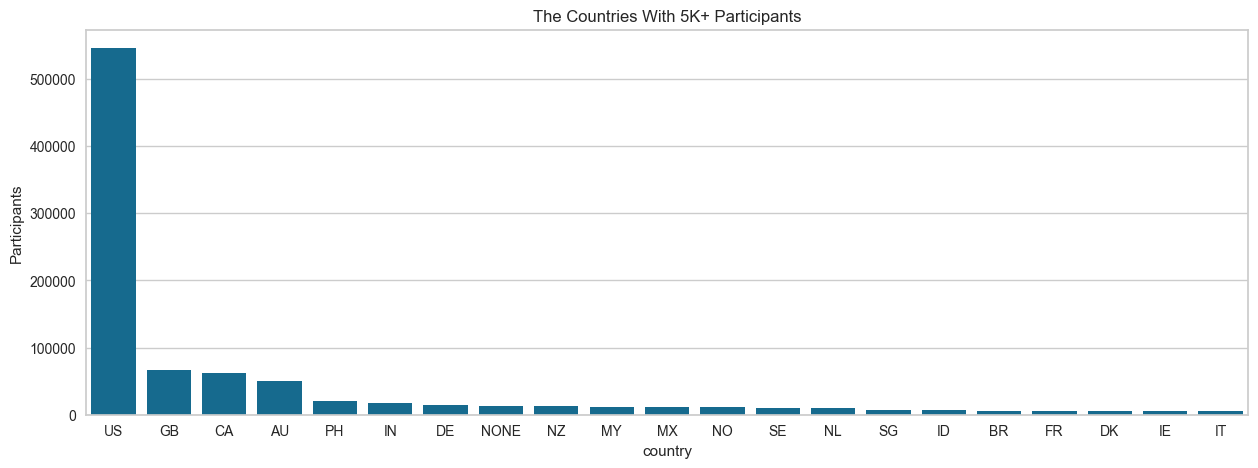

In [203]:
plt.figure(figsize=(15,5))
sns.barplot(data=countries_with_5K, x='country', y='count')
plt.title('The Countries With 5K+ Participants')
plt.ylabel('Participants')

In [186]:
# Groups and Questions
ext_questions = {'EXT1' : 'I am the life of the party',
                 'EXT2' : 'I dont talk a lot',
                 'EXT3' : 'I feel comfortable around people',
                 'EXT4' : 'I keep in the background',
                 'EXT5' : 'I start conversations',
                 'EXT6' : 'I have little to say',
                 'EXT7' : 'I talk to a lot of different people at parties',
                 'EXT8' : 'I dont like to draw attention to myself',
                 'EXT9' : 'I dont mind being the center of attention',
                 'EXT10': 'I am quiet around strangers'}

est_questions = {'EST1' : 'I get stressed out easily',
                 'EST2' : 'I am relaxed most of the time',
                 'EST3' : 'I worry about things',
                 'EST4' : 'I seldom feel blue',
                 'EST5' : 'I am easily disturbed',
                 'EST6' : 'I get upset easily',
                 'EST7' : 'I change my mood a lot',
                 'EST8' : 'I have frequent mood swings',
                 'EST9' : 'I get irritated easily',
                 'EST10': 'I often feel blue'}

agr_questions = {'AGR1' : 'I feel little concern for others',
                 'AGR2' : 'I am interested in people',
                 'AGR3' : 'I insult people',
                 'AGR4' : 'I sympathize with others feelings',
                 'AGR5' : 'I am not interested in other peoples problems',
                 'AGR6' : 'I have a soft heart',
                 'AGR7' : 'I am not really interested in others',
                 'AGR8' : 'I take time out for others',
                 'AGR9' : 'I feel others emotions',
                 'AGR10': 'I make people feel at ease'}

csn_questions = {'CSN1' : 'I am always prepared',
                 'CSN2' : 'I leave my belongings around',
                 'CSN3' : 'I pay attention to details',
                 'CSN4' : 'I make a mess of things',
                 'CSN5' : 'I get chores done right away',
                 'CSN6' : 'I often forget to put things back in their proper place',
                 'CSN7' : 'I like order',
                 'CSN8' : 'I shirk my duties',
                 'CSN9' : 'I follow a schedule',
                 'CSN10' : 'I am exacting in my work'}

opn_questions = {'OPN1' : 'I have a rich vocabulary',
                 'OPN2' : 'I have difficulty understanding abstract ideas',
                 'OPN3' : 'I have a vivid imagination',
                 'OPN4' : 'I am not interested in abstract ideas',
                 'OPN5' : 'I have excellent ideas',
                 'OPN6' : 'I do not have a good imagination',
                 'OPN7' : 'I am quick to understand things',
                 'OPN8' : 'I use difficult words',
                 'OPN9' : 'I spend time reflecting on things',
                 'OPN10': 'I am full of ideas'}

# Group Names and Columns
EXT = [column for column in df if column.startswith('EXT')]
EST = [column for column in df if column.startswith('EST')]
AGR = [column for column in df if column.startswith('AGR')]
CSN = [column for column in df if column.startswith('CSN')]
OPN = [column for column in df if column.startswith('OPN')]

In [187]:
def vis_questions(groupname, questions, color):
    plt.figure(figsize=(40,60))
    for i in range(1, 11):
        plt.subplot(10,5,i)
        plt.hist(df[groupname[i-1]], bins=14, color= color, alpha=.5)
        plt.title(questions[groupname[i-1]], fontsize=18)

Q&As Related to Extroversion Personality


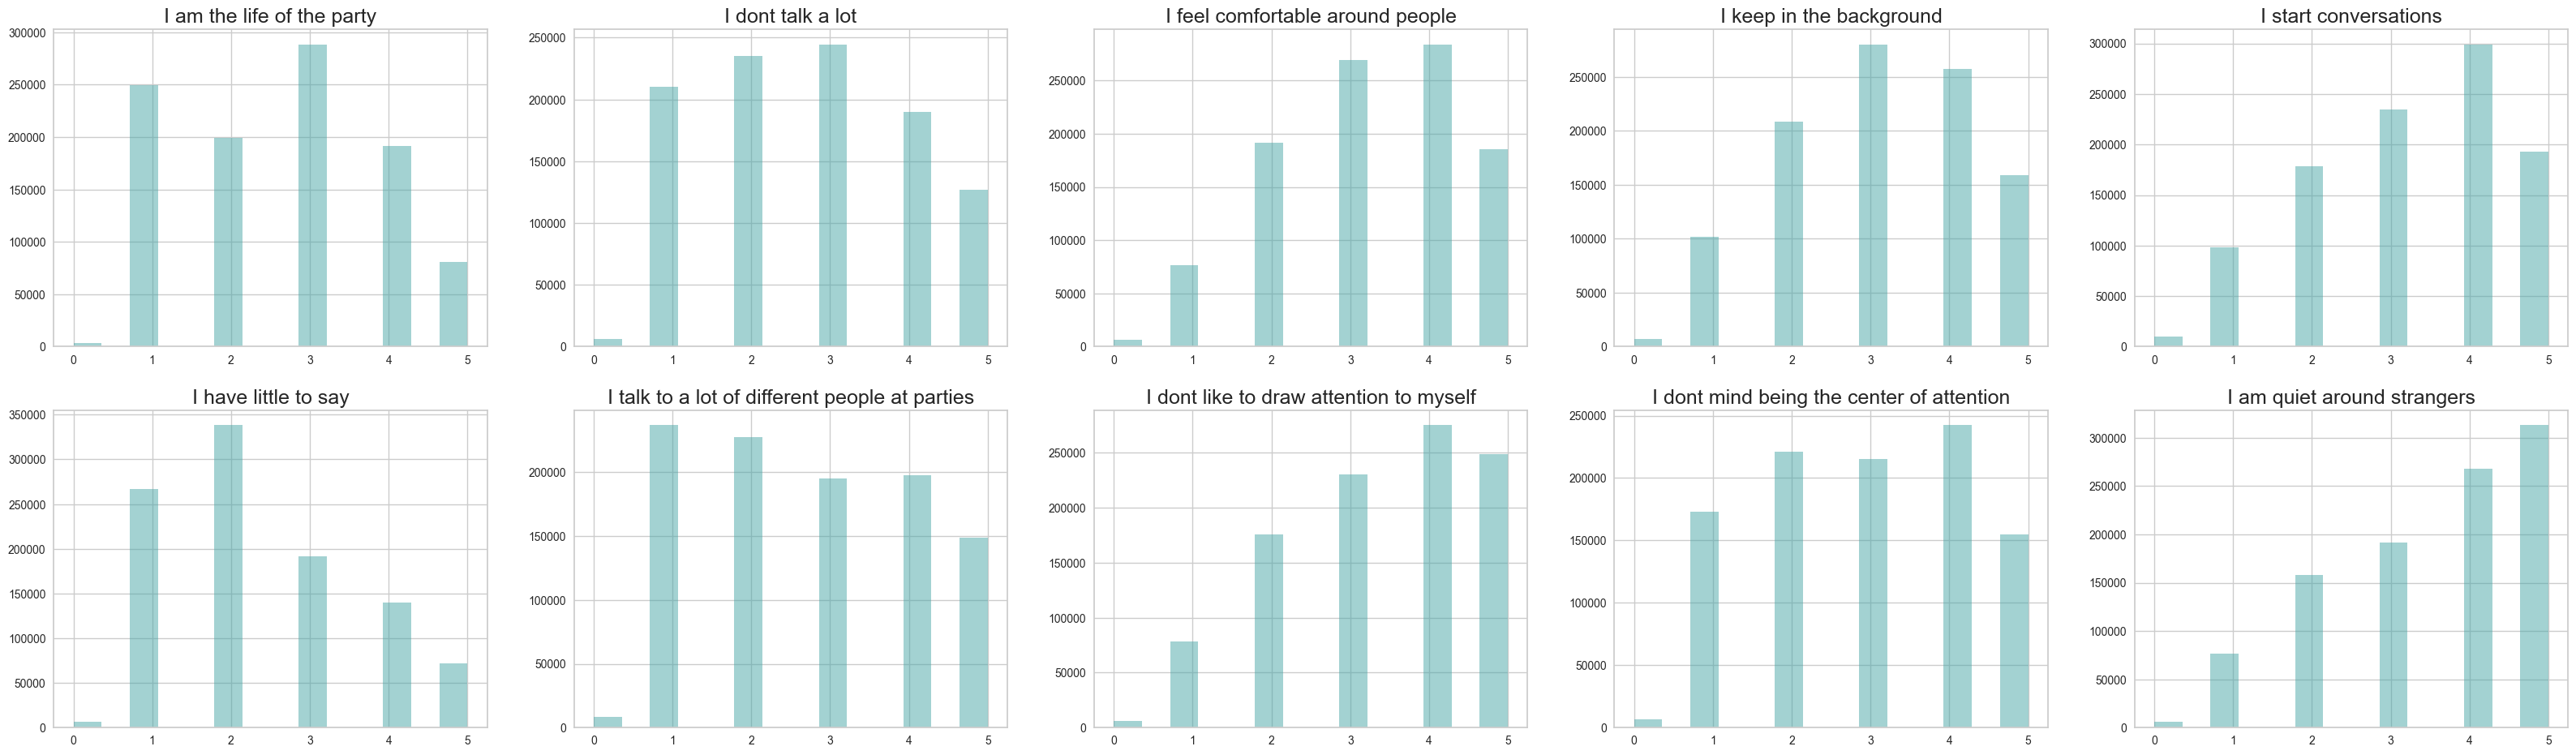

In [204]:
print('Q&As Related to Extroversion Personality')
vis_questions(EXT, ext_questions, '#48A6A7')

Q&As Related to Neuroticism Personality


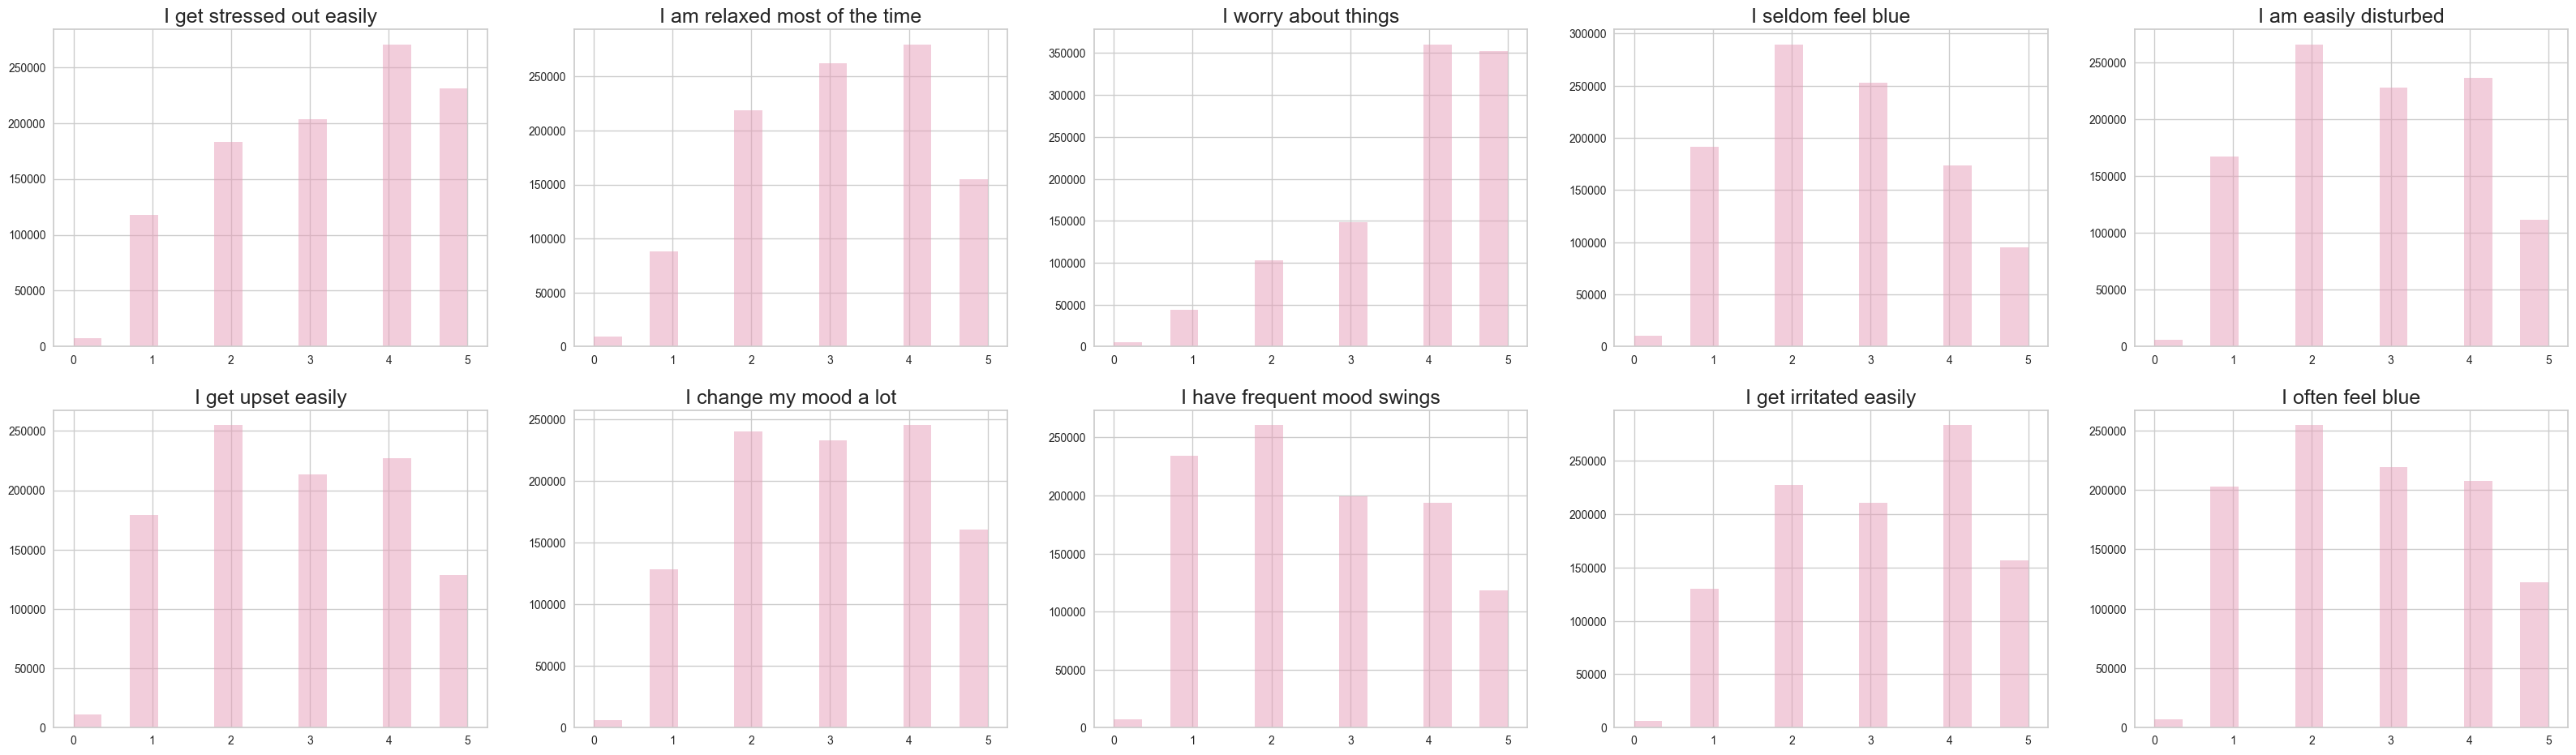

In [205]:
print('Q&As Related to Neuroticism Personality')
vis_questions(EST, est_questions, '#E69DB8')

Q&As Related to Agreeable Personality


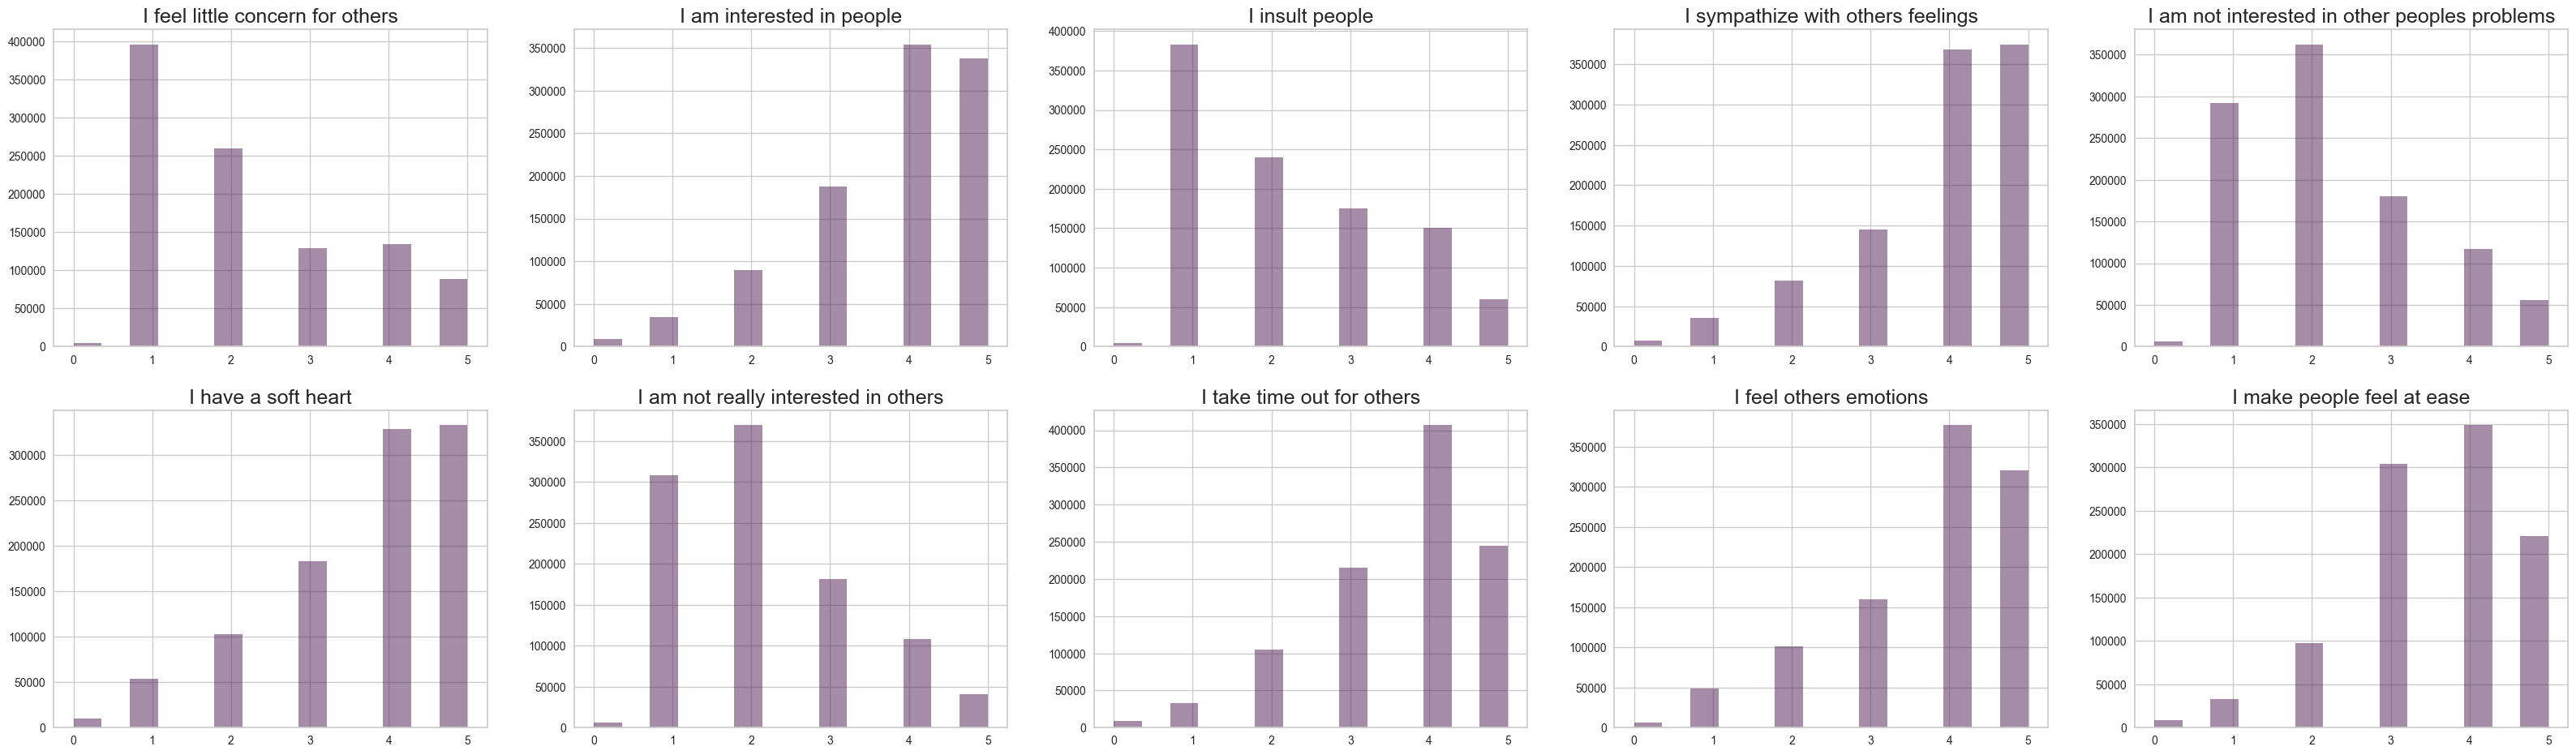

In [206]:
print('Q&As Related to Agreeable Personality')
vis_questions(AGR, agr_questions, '#4F1C51')

Q&As Related to Conscientious Personality


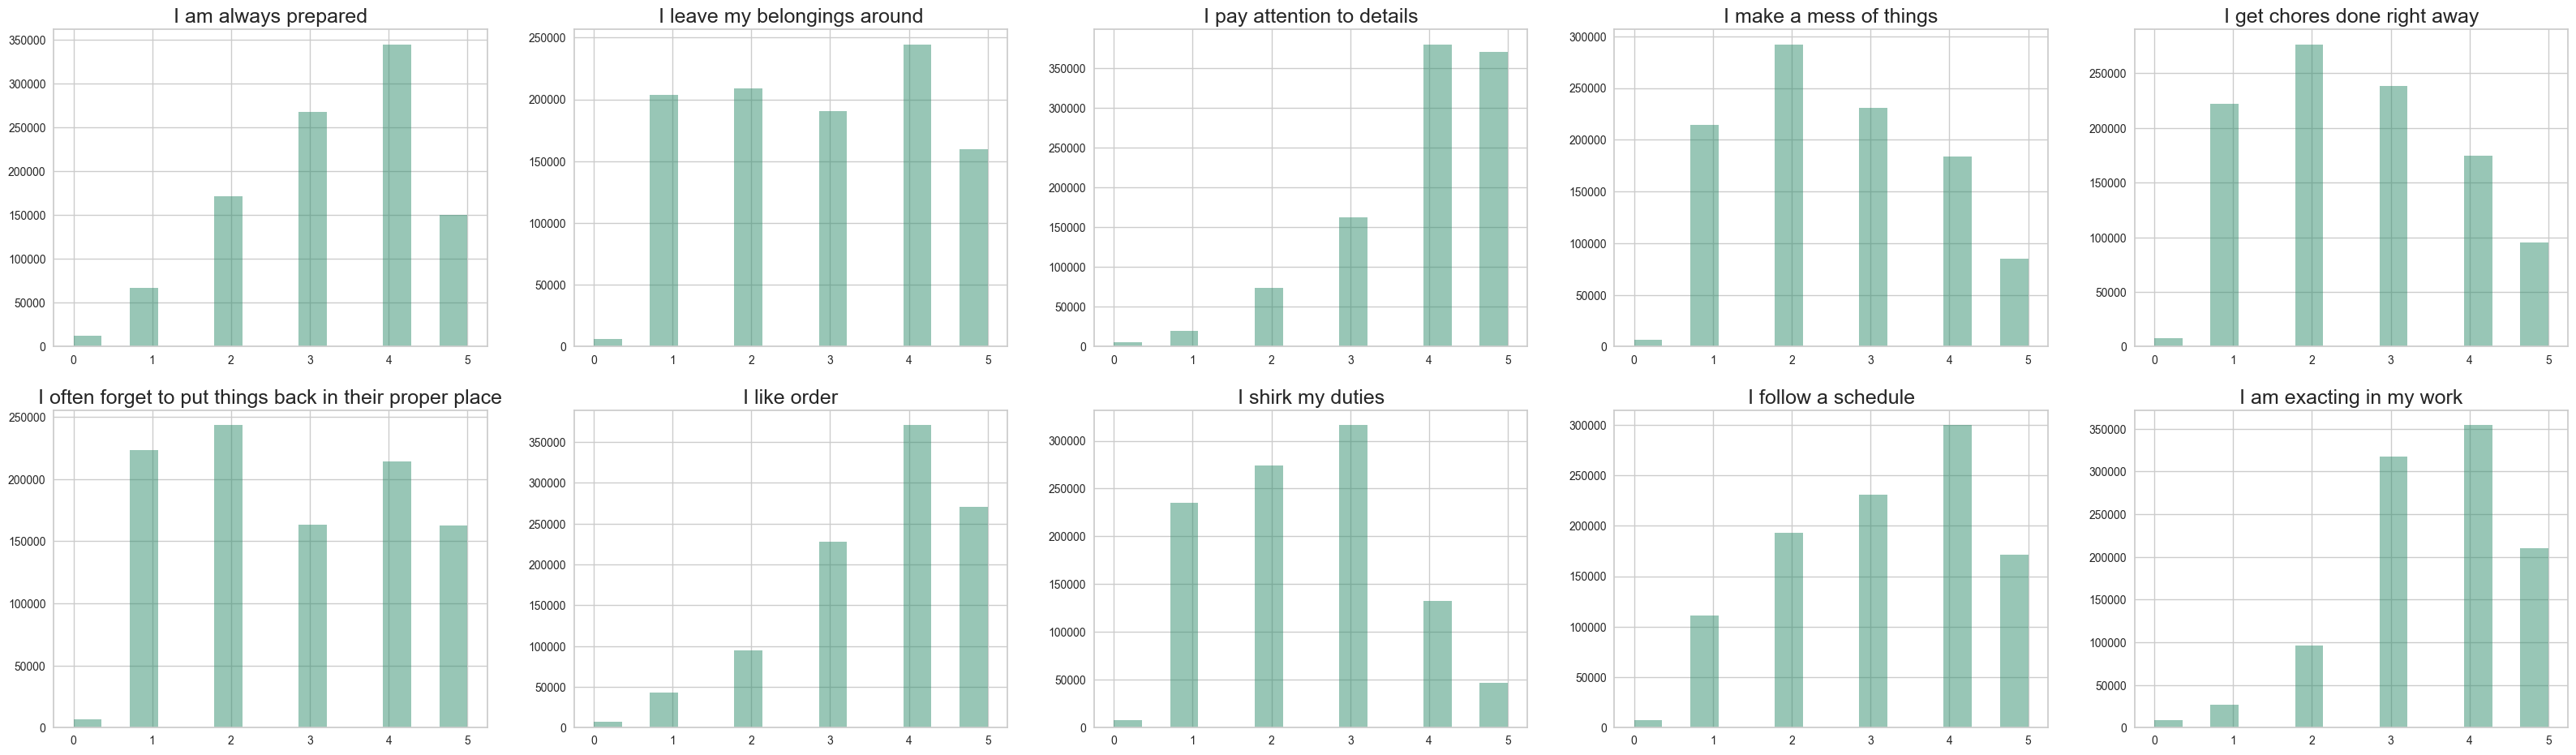

In [207]:
print('Q&As Related to Conscientious Personality')
vis_questions(CSN, csn_questions, '#328E6E')

Q&As Related to Open Personality


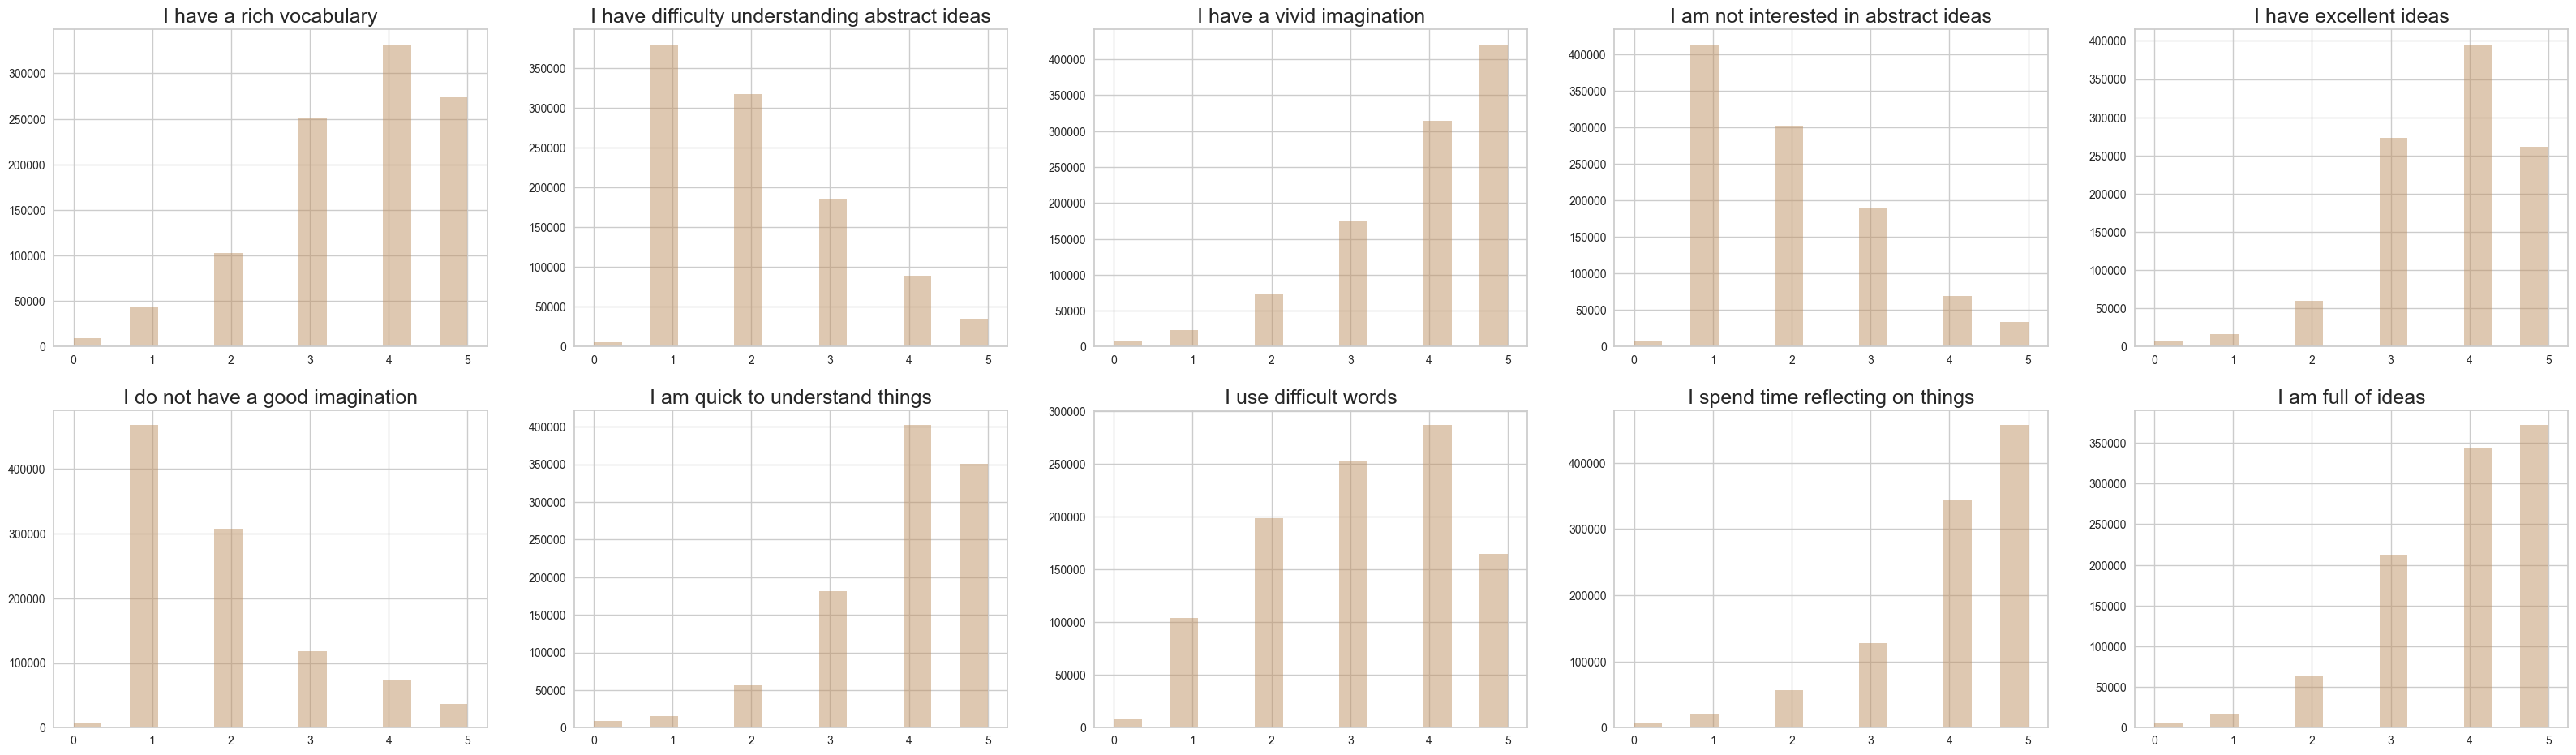

In [208]:
print('Q&As Related to Open Personality')
vis_questions(OPN, opn_questions, '#BF9264')

## How Many Numbers of Clusters Should We Choose For `k`?

Basically, and based on the perosnality we could choose 5 right away and for each cluster could define one personalit, or each cluster could combine one or two perosnality.

But, let try to find out by trying to find the `Elbow` theorem

In [193]:
clus_num = df.drop('country', axis=1)
columns = list(clus_num.columns)

scaler = MinMaxScaler(feature_range=(0,1))
clus_num = scaler.fit_transform(clus_num)
clus_num = pd.DataFrame(clus_num, columns=columns)
clus_num_sample = clus_num[:5000]

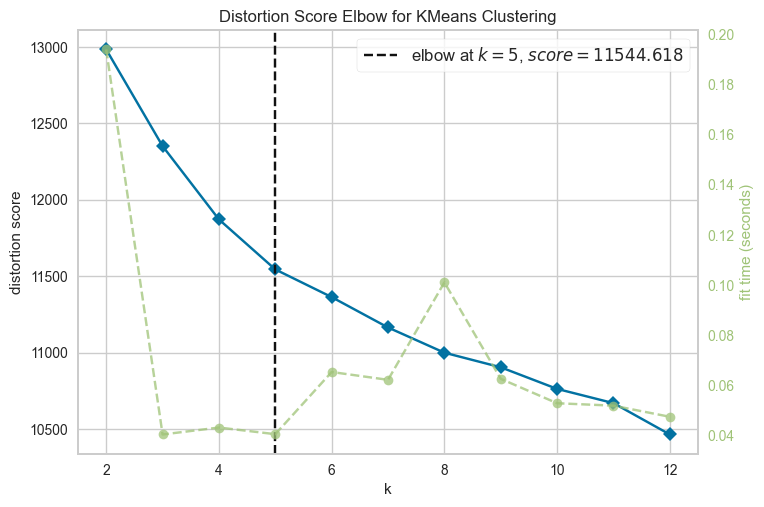

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,13))
visualizer.fit(clus_num_sample)
visualizer.poof()

As shown in the figure, `k=5` is proparly the ideal choice, and as said before; it became clearer now.

## Clustering The Instances into `5` Personality Groups Clusters

In [209]:
kmeans_model = df.drop('country', axis=1)

kmeans = KMeans(n_clusters=5, random_state=42)
k_fit = kmeans.fit(kmeans_model)

In [210]:
predictions = k_fit.labels_
kmeans_model['Clusters'] = predictions
kmeans_model.head(15)

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,...,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,Clusters
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,...,4.0,1.0,5.0,3.0,4.0,5.0,2
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,...,3.0,1.0,4.0,2.0,5.0,3.0,0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,...,4.0,2.0,5.0,3.0,4.0,4.0,0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,...,3.0,1.0,4.0,4.0,3.0,3.0,0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,...,5.0,1.0,5.0,3.0,5.0,5.0,2
5,3.0,3.0,4.0,2.0,4.0,2.0,2.0,...,3.0,1.0,5.0,4.0,5.0,2.0,2
6,4.0,3.0,4.0,3.0,3.0,3.0,5.0,...,4.0,1.0,5.0,5.0,4.0,4.0,1
7,3.0,1.0,5.0,2.0,5.0,2.0,5.0,...,5.0,1.0,4.0,3.0,4.0,5.0,2
8,2.0,2.0,3.0,3.0,4.0,2.0,2.0,...,4.0,1.0,5.0,2.0,5.0,5.0,2
9,1.0,5.0,3.0,5.0,2.0,3.0,2.0,...,3.0,3.0,4.0,3.0,3.0,3.0,0


## Trying to Analyze the Model Predictions

In [211]:
kmeans_model.Clusters.value_counts()

Clusters
4    258352
2    254033
1    250514
0    245803
3      4779
Name: count, dtype: int64

As we can see, we've:
- `Cluster 0`: 245803
- `Cluster 1`: 250514
- `Cluster 2`: 254033
- `Cluster 3`: 4779
- `Cluster 4`: 258352

> Now, we'll group by the `Clusters`, so in such way we can see the average of each answer in each question for each cluster

In such way, we can -at least- know what the model is trying/classifiyng


In [212]:
kmeans_model.groupby('Clusters').mean()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,...,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
Clusters,,,,,,,,,,,,,,,
0,2.081069,3.514713,2.861055,3.662693,2.611543,2.938097,2.057123,...,2.110670,3.700024,2.091150,4.004121,3.106118,3.946140,3.746484
1,3.432495,1.940171,3.784619,2.512746,4.017995,1.848703,3.624253,...,1.979566,3.948318,1.786794,3.961116,3.357748,4.157995,4.181758
2,3.278251,2.108187,4.207170,2.413289,4.132188,1.771734,3.666984,...,1.830058,4.105978,1.685860,4.279263,3.177938,4.136313,4.231915
3,1.175141,0.885541,0.759364,0.541954,0.417661,0.254865,0.174723,...,0.356978,0.321615,0.166771,0.163842,0.158820,0.184976,0.308014
4,1.834613,3.563878,2.357110,4.015754,2.403531,3.084300,1.792818,...,2.111611,3.486874,2.049433,3.737471,3.145449,4.317013,3.742166


> Now, we could sum up all the questions groups (e.x, `EST`, `EST`...etc.,) to show if they're any pattern to detect

In [213]:
col_list = list(kmeans_model)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

data_sums = pd.DataFrame()
data_sums['extroversion'] = kmeans_model[ext].sum(axis=1)/10
data_sums['neurotic'] = kmeans_model[est].sum(axis=1)/10
data_sums['agreeable'] = kmeans_model[agr].sum(axis=1)/10
data_sums['conscientious'] = kmeans_model[csn].sum(axis=1)/10
data_sums['open'] = kmeans_model[opn].sum(axis=1)/10
data_sums['clusters'] = predictions
data_sums.groupby('clusters').mean()

,extroversion,neurotic,agreeable,conscientious,open
clusters,,,,,
0,3.015325,2.652890,3.006059,3.041330,3.207582
1,3.069237,3.381798,3.286023,3.196128,3.344046
2,3.084314,2.494842,3.210528,3.119286,3.314167
3,0.476648,0.416907,0.449592,0.426679,0.392404
4,2.974227,3.599191,3.166856,3.184839,3.251015


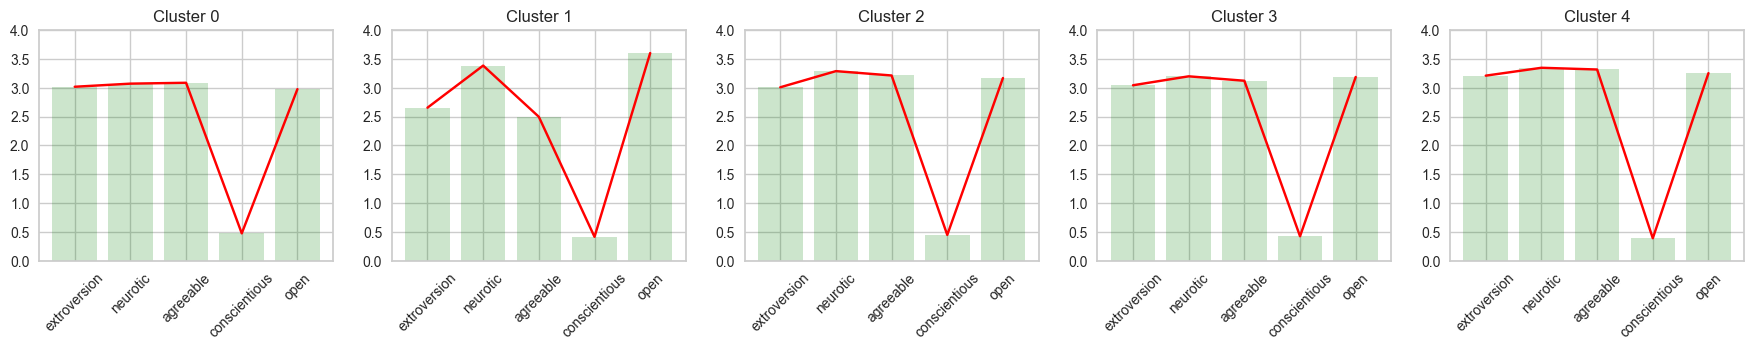

In [ ]:
dataclusters = data_sums.groupby('clusters').mean()
plt.figure(figsize=(22,3))
for i in range(0, 5):
    plt.subplot(1,5,i+1)
    plt.bar(dataclusters.columns, dataclusters.iloc[:, i], color='green', alpha=0.2)
    plt.plot(dataclusters.columns, dataclusters.iloc[:, i], color='red')
    plt.title('Cluster ' + str(i))
    plt.xticks(rotation=45)
    plt.ylim(0,4);

### As we can see in the figure above the `conscientious` is having the least average (mean) answering in each cluster

In [ ]:
import joblib
joblib.dump(k_fit, 'kmeans_model.pkl')

## Visualizing the Clusters Predictions in 3D

In [219]:
pca = PCA(n_components=3)
pca_fit = pca.fit_transform(df.drop('country', axis=1))

df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2', 'PCA3'])
df_pca['Clusters'] = predictions
df_pca.head()

,PCA1,PCA2,PCA3,Clusters
0,5.445741,1.488372,-2.411321,2
1,-0.258568,-3.048924,3.088041,0
2,0.619510,-2.151917,1.480418,0
3,-1.128804,-0.248462,-2.000365,0
4,4.694848,-2.474228,4.478382,2


C:\Users\1xopw\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



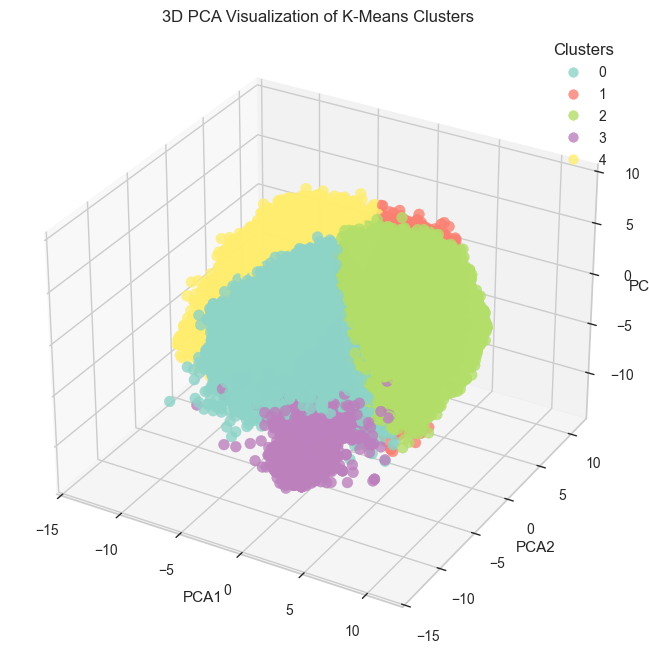

In [220]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    df_pca['PCA1'], df_pca['PCA2'], df_pca['PCA3'],
    c=df_pca['Clusters'], cmap='Set3', s=60, alpha=0.8
)

ax.set_title('3D PCA Visualization of K-Means Clusters')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')

plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()